### Import Necessary Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Covid Data.csv')# Load the dataset

In [3]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


### Data Dictionary (ABT DATA)

1. sex: 1 for female and 2 for male.




2. age: of the patient.




3. patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.



4. pneumonia: whether the patient already have air sacs inflammation or not.



5. pregnancy: whether the patient is pregnant or not.



6. diabetes: whether the patient has diabetes or not.



7. copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.



8. asthma: whether the patient has asthma or not.




9. inmsupr: whether the patient is immunosuppressed or not.




10. hypertension: whether the patient has hypertension or not.



11. cardiovascular: whether the patient has heart or blood vessels related disease.




12. renal chronic: whether the patient has chronic renal disease or not.



13. other disease: whether the patient has other disease or not.



14. obesity: whether the patient is obese or not.



15. tobacco: whether the patient is a tobacco user.



16. usmr: Indicates whether the patient treated medical units of the first, second or third level.



17. medical unit: type of institution of the National Health System that provided the care.



18. intubed: whether the patient was connected to the ventilator.



19. icu: Indicates whether the patient had been admitted to an Intensive Care Unit.



20. date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.



21. classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

### Columns

In [4]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

Traget Column is If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

### Create a Target Column

In [6]:
def target(x):
    if x == '9999-99-99':
        return 0
    else:
        return 1

In [7]:
df['Target'] = df.DATE_DIED.map(target)

In [8]:
df['Target'].value_counts()

0    971633
1     76942
Name: Target, dtype: int64

In [9]:
df.drop('DATE_DIED',inplace=True,axis=1)

unbalanced dataset so we will do oversampling in future

### Correlation matrix

<AxesSubplot:>

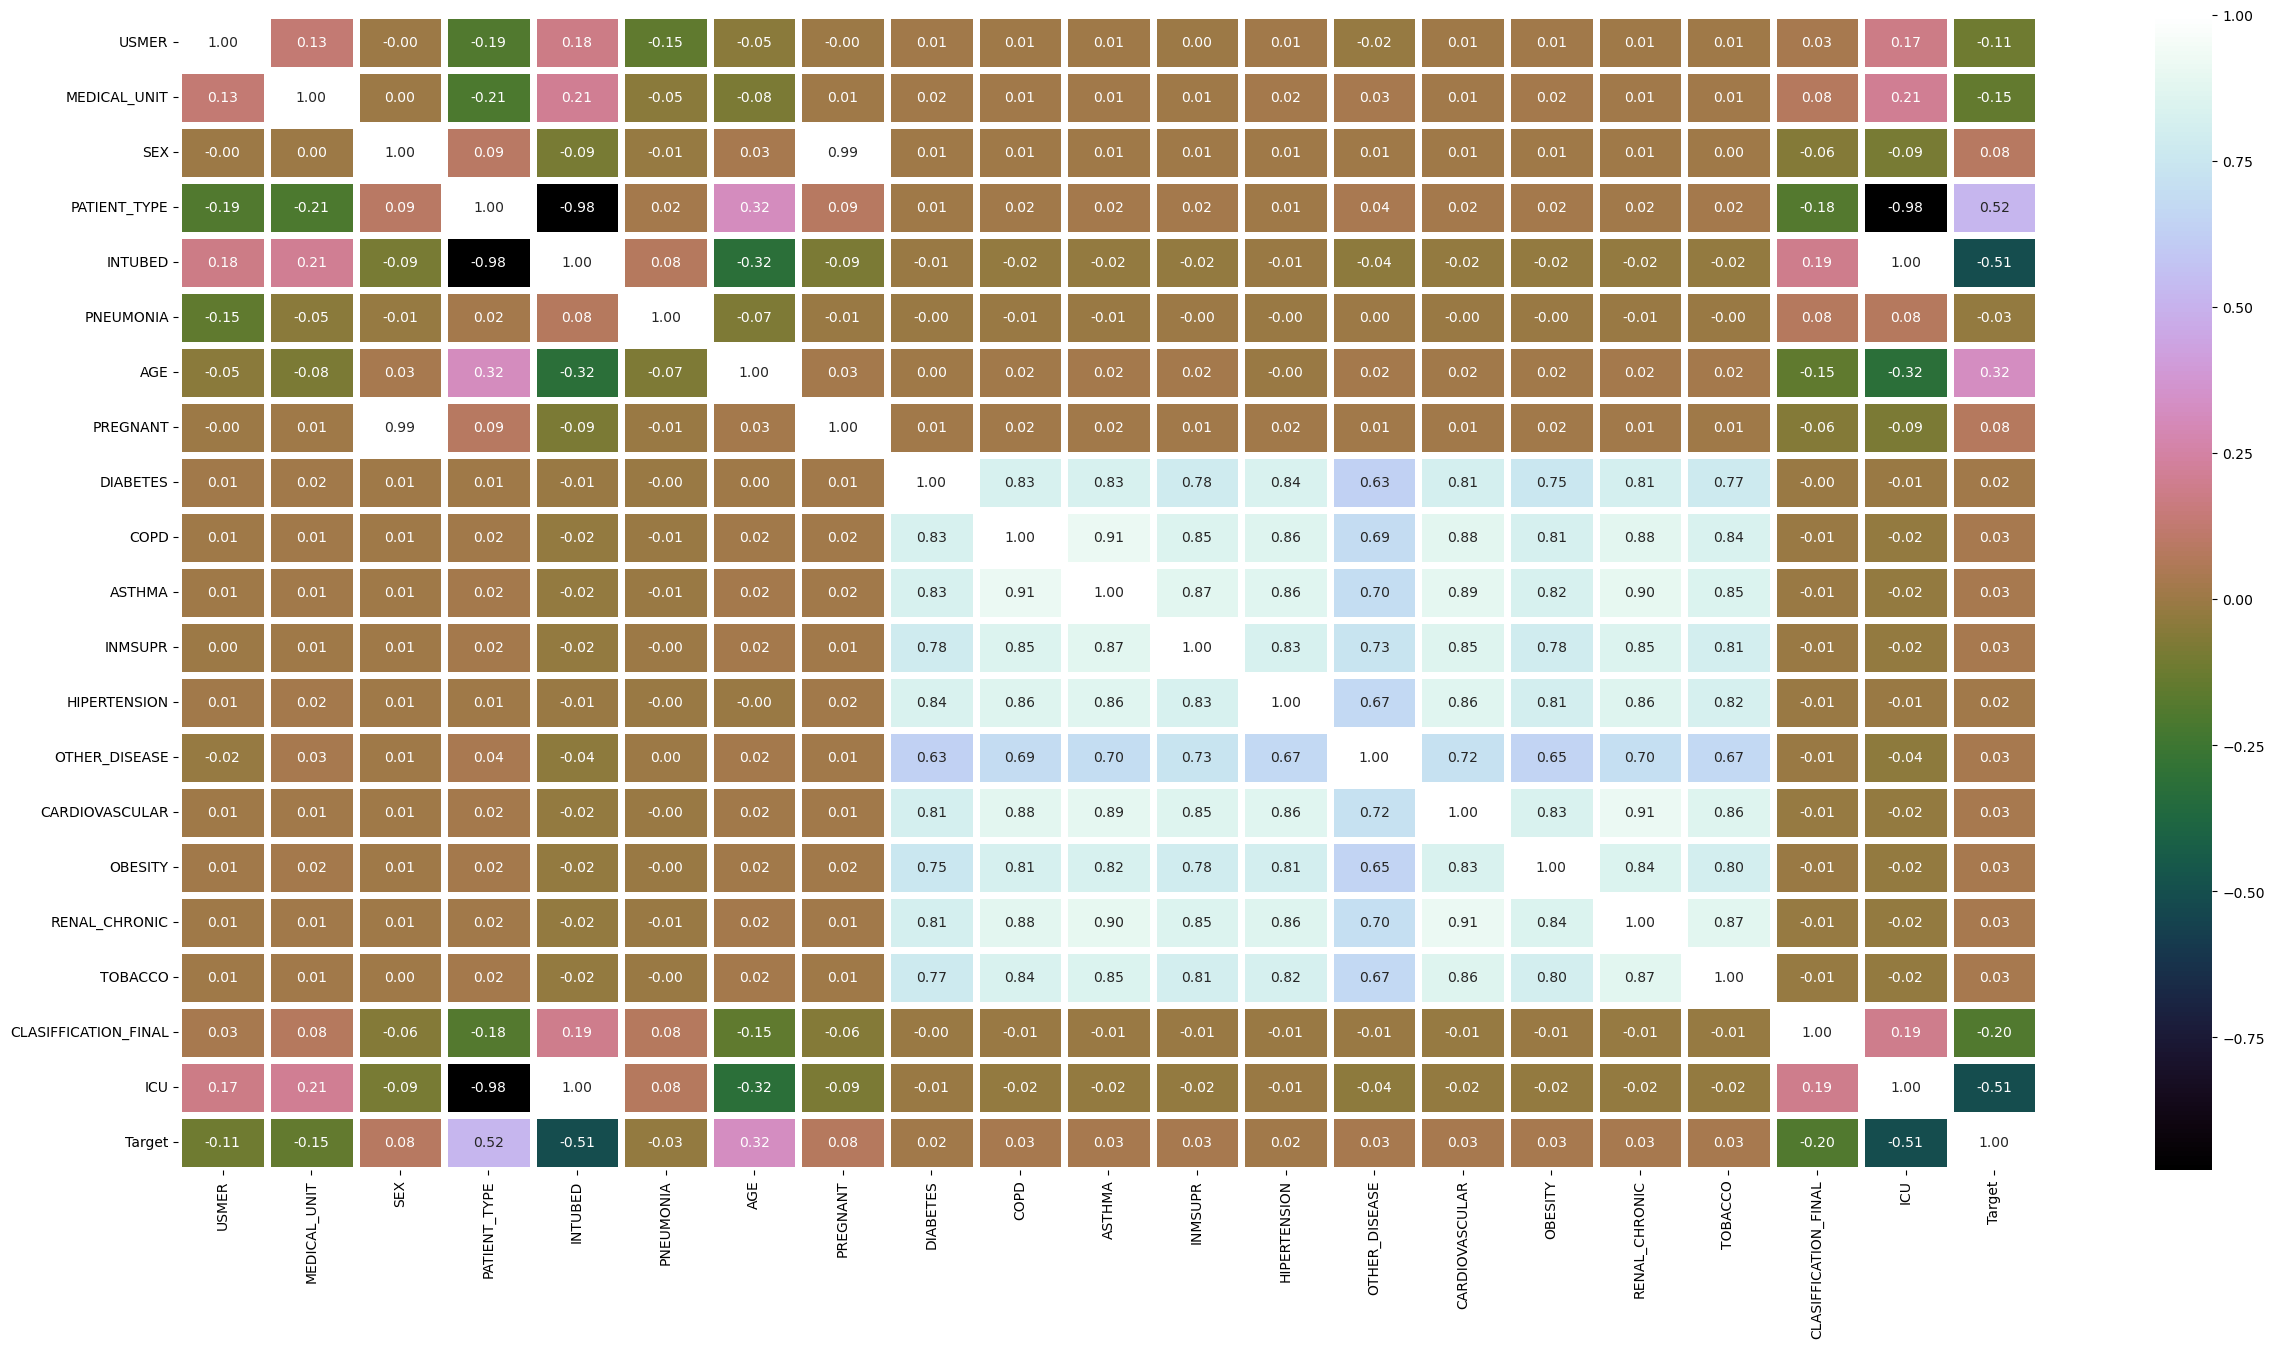

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(30,15))

sns.heatmap(corr_matrix,
            fmt='.2f',
            annot=True,
           linewidth=5,
           cmap = "cubehelix")

In [11]:
cols_to_drop = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO']


df.drop(cols_to_drop,axis=1,inplace=True)

before going into Any transformations first split our dataset into train,test to prevent from data
leakage

In [13]:
# now we do oversampling 
count_0,count1 = df.Target.value_counts()

over_0 = df[df['Target']==0]
over_1 = df[df['Target']==1]

over_sample_1 = over_1.sample(count_0,replace=True)

df = pd.concat([over_0,over_sample_1],axis=0)

In [14]:
df.Target.value_counts()

0    971633
1    971633
Name: Target, dtype: int64

**split the dataset into train and test**

In [16]:
train,test = train_test_split(df,test_size=0.2,stratify=df['Target'])

In [17]:
train.Target.value_counts()

0    777306
1    777306
Name: Target, dtype: int64

In [18]:
test.Target.value_counts()

1    194327
0    194327
Name: Target, dtype: int64

**Some stats**

In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1554612.0,1.543371,0.498116,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1554612.0,8.075998,3.826323,1.0,4.0,9.0,12.0,13.0
SEX,1554612.0,1.565633,0.495674,1.0,1.0,2.0,2.0,2.0
PATIENT_TYPE,1554612.0,1.521930,0.499519,1.0,1.0,2.0,2.0,2.0
INTUBED,1554612.0,48.829817,47.704877,1.0,2.0,2.0,97.0,99.0
AGE,1554612.0,50.666183,18.845157,0.0,37.0,51.0,65.0,120.0
PREGNANT,1554612.0,55.957183,47.066288,1.0,2.0,97.0,97.0,98.0
CLASIFFICATION_FINAL,1554612.0,4.701731,1.915244,1.0,3.0,3.0,7.0,7.0
ICU,1554612.0,48.962412,47.588828,1.0,2.0,2.0,97.0,99.0
Target,1554612.0,0.500000,0.500000,0.0,0.0,0.5,1.0,1.0


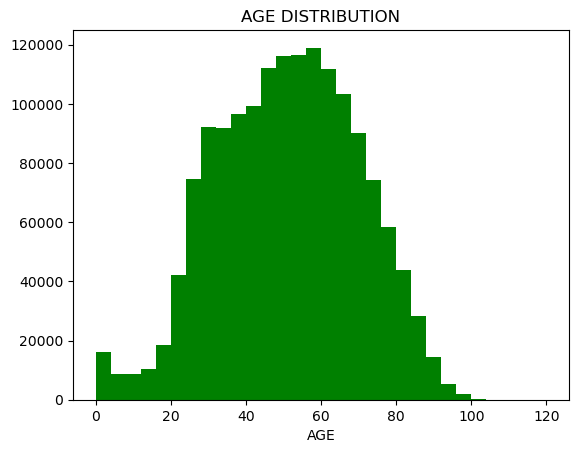

In [20]:
plt.hist(train.AGE,bins=30,color=['green'])
plt.title("AGE DISTRIBUTION")
plt.xlabel('AGE');

here we can see the ages are distributed 0-120 its amazing but let we assume more than 100 age peoples are otliers

**In the datasest they provide info values are 99,98,97 are missing values**

In [22]:
train.replace({97: np.nan, 98: np.nan, 99: np.nan}, inplace=True)# Filling missing value with -1

In [23]:
train.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 768663
AGE                       1299
PREGNANT                883012
CLASIFFICATION_FINAL         0
ICU                     768910
Target                       0
dtype: int64

In [24]:
train.fillna(-1,inplace=True)# Filled missing value with -1

In [25]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1554612.0,1.543371,0.498116,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1554612.0,8.075998,3.826323,1.0,4.0,9.0,12.0,13.0
SEX,1554612.0,1.565633,0.495674,1.0,1.0,2.0,2.0,2.0
PATIENT_TYPE,1554612.0,1.521930,0.499519,1.0,1.0,2.0,2.0,2.0
INTUBED,1554612.0,0.341917,1.369484,-1.0,-1.0,1.0,2.0,2.0
AGE,1554612.0,50.583671,18.854996,-1.0,37.0,51.0,65.0,120.0
PREGNANT,1554612.0,0.291301,1.482234,-1.0,-1.0,-1.0,2.0,2.0
CLASIFFICATION_FINAL,1554612.0,4.701731,1.915244,1.0,3.0,3.0,7.0,7.0
ICU,1554612.0,0.458624,1.460525,-1.0,-1.0,1.0,2.0,2.0
Target,1554612.0,0.500000,0.500000,0.0,0.0,0.5,1.0,1.0


now the summary of the dataset value are less spreaded Not more deviated from mean

In [26]:
#removing outliers
train = train[train['AGE']<=100]

In [27]:
max(train.AGE)# we remove the outlier

100.0

### Prepare the training set and also val and test

In [28]:
train.Target.value_counts()

0    777205
1    777171
Name: Target, dtype: int64

In [29]:
x_train = train.drop('Target',axis=1)

y_train = train['Target']

In [30]:
scaler = MinMaxScaler()# scaling the values from 0-1

x_train = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train)

let preprocess `test set` so that we can val and test our model(whatever we did in `training` samples that exactly we wanna do in `test` an `val` samples)

1. First we remove the outlier in ages column


2. we filled the missing values with -1


3. sacling using MinmaxScaler

#### Now test set

In [31]:
test.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,AGE,PREGNANT,CLASIFFICATION_FINAL,ICU,Target
445008,1,12,2,2,99,57,97,7,99,1
610721,1,12,1,1,97,39,2,3,97,0
444228,2,11,1,2,2,39,2,7,2,0
47994,1,4,2,2,1,61,97,3,2,1
453780,1,12,2,2,1,45,97,7,1,1


first we split the data into val and test

#### removed outliers

In [32]:
test = test[test['AGE']<=100]

#### Filled missing values

In [33]:
test.replace({97:np.nan,98:np.nan,99:np.nan},inplace=True)

test.fillna(-1,inplace=True)

##### Splitted into `test` and `val`

In [34]:
test,val = train_test_split(test,test_size=0.3,random_state=42,stratify=test['Target'])

In [35]:
val.Target.value_counts()

0    58291
1    58290
Name: Target, dtype: int64

In [36]:
test.Target.value_counts()

0    136013
1    136009
Name: Target, dtype: int64

In [37]:
x_test = test.drop('Target',axis=1)
y_test = test['Target']

x_val = val.drop('Target',axis=1)
y_val = val['Target']

##### Feature Scaling

In [38]:
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [39]:
x_test = pd.DataFrame(x_test)
x_val = pd.DataFrame(x_val)

In [40]:
len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test)

(1554376, 1554376, 116581, 116581, 272022, 272022)

In [89]:
x_val

,0,1,2,3,4,5,6,7,8
0,0.0,0.250000,1.0,1.0,0.666667,0.702970,0.0,0.333333,1.0
1,1.0,0.916667,1.0,1.0,0.666667,0.603960,0.0,1.000000,1.0
2,1.0,0.916667,1.0,1.0,1.000000,0.613861,0.0,1.000000,1.0
3,1.0,0.250000,1.0,1.0,0.666667,0.831683,0.0,0.333333,1.0
4,0.0,0.250000,1.0,1.0,0.666667,0.544554,0.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
116576,0.0,0.250000,1.0,1.0,0.666667,0.465347,0.0,0.333333,1.0
116577,1.0,0.916667,0.0,0.0,0.000000,0.326733,1.0,1.000000,0.0
116578,0.0,0.916667,1.0,0.0,0.000000,0.524752,0.0,1.000000,0.0
116579,0.0,0.916667,1.0,1.0,1.000000,0.871287,0.0,0.333333,1.0


now we prepared our data `train val test`

### Now we Build a Model 

1. Random Forest 



2. XGBOOST

#### RANDOM FOREST

In [50]:
random_forest = RandomForestClassifier(n_estimators=200,random_state=42)

random_forest.fit(x_train,y_train)

val_acc = random_forest.score(x_val,y_val)

test_acc = random_forest.score(x_test,y_test)

In [63]:
print(f'RANDOM FOREST ACCURACY (TEST): {test_acc}')
print(f'RANDOM FOREST ACCURACY (VAL): {val_acc}')

RANDOM FOREST ACCURACY (TEST): 0.9153193491702877
RANDOM FOREST ACCURACY (VAL): 0.9140254415385012


In [54]:
rf_y_pred = random_forest.predict(x_test)

### Classification Report

In [55]:
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91    136013
           1       0.89      0.94      0.92    136009

    accuracy                           0.92    272022
   macro avg       0.92      0.92      0.92    272022
weighted avg       0.92      0.92      0.92    272022



### Confusion Matrix

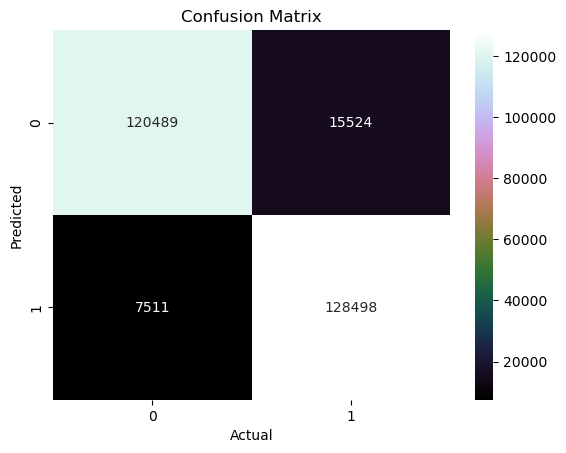

In [60]:
cm = confusion_matrix(y_test,rf_y_pred)


sns.heatmap(cm,
           fmt='d',
           cmap='cubehelix',
           annot=True)
plt.title('Confusion Matrix')

plt.xlabel('Actual')

plt.ylabel('Predicted');

#### XGBOOST

In [43]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators = 200,random_state=42)

xgb_model.fit(x_train,y_train)

val_score = xgb_model.score(x_val,y_val)

test_score = xgb_model.score(x_test,y_test)

In [62]:
print(f'XGBOOST ACCURACY (TEST): {test_score}')
print(f'XGBOOST ACCURACY (VAL): {val_score}')

XGBOOST ACCURACY (TEST): 0.9088161986898119
XGBOOST ACCURACY (VAL): 0.907609301687239


In [45]:
y_pred = xgb_model.predict(x_test)

### Classification Report

In [46]:
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91    136013
           1       0.89      0.94      0.91    136009

    accuracy                           0.91    272022
   macro avg       0.91      0.91      0.91    272022
weighted avg       0.91      0.91      0.91    272022



### Confusion Matrix

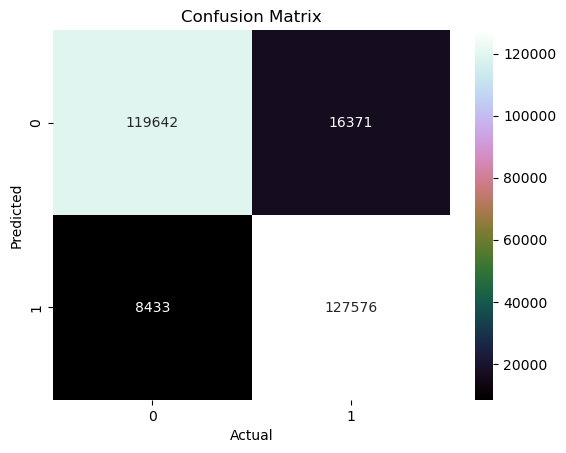

In [61]:
cm = confusion_matrix(y_test,y_pred)


sns.heatmap(cm,
           fmt='d',
           cmap='cubehelix',
           annot=True)
plt.title('Confusion Matrix')

plt.xlabel('Actual')

plt.ylabel('Predicted');

#### ROC CURVE FOR BOTH MODEL

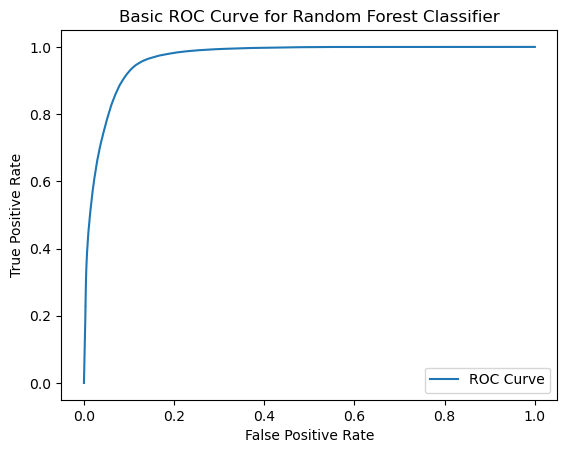

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = random_forest.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Basic ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

In [71]:
print(f'Random Forest Classsifier ROC_AUC_SCORE : {roc_auc_score(y_test,y_prob)}')

Random Forest Classsifier ROC_AUC_SCORE : 0.9668473860023754


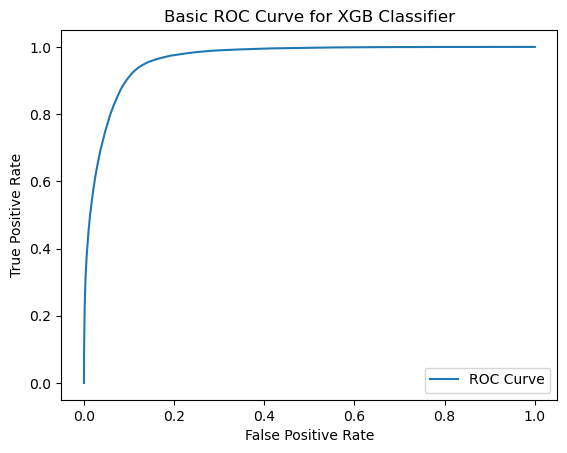

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = xgb_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Basic ROC Curve for XGB Classifier')
plt.legend()
plt.show()

In [73]:
print(f'XGB Classsifier ROC_AUC_SCORE : {roc_auc_score(y_test,y_probs)}')

XGB Classsifier ROC_AUC_SCORE : 0.9635583987907919


In [75]:
import joblib

joblib.dump(random_forest,'covid-19 model.pkl')

['covid-19 model.pkl']

In [214]:
joblib.dump(random_forest,'covid-19 v2.joblib')

['covid-19 v2.joblib']

In [79]:
model = joblib.load('covid-19 model.pkl')

In [92]:
train

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,AGE,PREGNANT,CLASIFFICATION_FINAL,ICU,Target
958166,2,12,1,1,-1.0,31.0,2.0,7,-1.0,0
22409,1,4,2,2,1.0,59.0,-1.0,3,2.0,1
448743,2,12,2,1,-1.0,93.0,-1.0,3,-1.0,1
462942,1,12,2,2,2.0,56.0,-1.0,7,2.0,1
48467,2,4,2,2,1.0,71.0,-1.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...
431553,2,10,2,2,2.0,77.0,-1.0,6,2.0,1
514292,1,12,1,2,2.0,66.0,2.0,3,2.0,0
436673,2,10,2,1,-1.0,45.0,-1.0,6,-1.0,0
1040351,2,12,2,1,-1.0,40.0,-1.0,7,-1.0,0


Indicates whether the patient treated medical units of the first, second or third level.

In [208]:
class_name = ['not in a risk','patient in risk']

In [212]:
values = np.array([[2,2,2,2,1,23,1,2,2]])
values_scaled = scaler.transform(values)
predicted = model.predict(values_scaled)

C:\Users\thesu\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [213]:
class_name[predicted[0]]

'patient in risk'

In [192]:
scaler.data_max_

array([  2.,  13.,   2.,   2.,   2., 100.,   2.,   7.,   2.])

In [194]:
values_scaled

array([[0.        , 0.58333333, 1.        , 1.        , 0.66666667,
        0.61386139, 0.        , 0.33333333, 0.66666667]])

In [150]:
train.to_csv('training_csv',index=False)

In [190]:
test

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,AGE,PREGNANT,CLASIFFICATION_FINAL,ICU,Target
31824,2,4,2,2,1.0,64.0,-1.0,2,2.0,1
229480,2,4,1,1,-1.0,35.0,2.0,7,-1.0,0
383481,1,8,2,2,1.0,61.0,-1.0,3,1.0,1
42216,2,4,2,2,2.0,56.0,-1.0,7,2.0,1
524882,1,12,1,1,-1.0,42.0,1.0,3,-1.0,0
...,...,...,...,...,...,...,...,...,...,...
467575,1,12,2,2,2.0,62.0,-1.0,3,2.0,1
448303,1,12,1,2,2.0,73.0,2.0,3,2.0,1
33868,2,4,2,1,-1.0,71.0,-1.0,3,-1.0,1
43478,1,4,1,2,2.0,80.0,2.0,7,2.0,1
